In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
#define variables

In [16]:
q = 1
sigma = 2 
walks = 50
R = 1
T=1
N = 500
dt = T/N
sigmaSqrtDt = sigma * np.sqrt(T/N)
def u(X) :
    pre = q / (2*np.pi * (X[0]**2 + X[1]**2)) 
    return np.array([1+pre*X[0], pre*X[1]])

In [4]:
times = np.linspace(0,T,N)
X = np.zeros((2,N))
X[:,0] = [1.2,1.1]
#X[:,0] = [3,4]
#X[:,0] = [2.5,2.5]

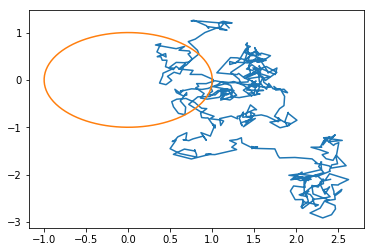

In [43]:
#diff equation
for i in range(N-1):
    X[:,i+1] = X[:,i] + u(X[:,i]) * dt + sigmaSqrtDt* norm.rvs(size=2) 
plt.plot(X[0,:],X[1,:])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))

In [54]:
q = 1
sigma = 2 
walks = 50
R = 1
T=1
N = 500
dt = T/N
sigmaSqrtDt = sigma * np.sqrt(T/N)
def u(X) :
    pre = q / (2*np.pi * (X[0]**2 + X[1]**2)) 
    return np.array([1+pre*X[0], pre*X[1]])
polluted = 0
for w in range(walks):
    #diff equation
    Xthis = np.array([1.1,1.2])
    for i in range(N-1):    
        Xnext = Xthis + u(Xthis) * dt + sigmaSqrtDt* norm.rvs(size=2) 
        r = np.sqrt( Xnext[0]**2 + Xnext[1]**2 )
        if (r < 1): break
    if (r< 1) : polluted +=1

print(polluted/walks)

0.0


In [21]:
polluted

0

In [51]:
polluted = 0
walks = 200000
printeach = 10000
maxiter = 10000
for w in range(walks):
    #diff equation
    T = 0
    for i in range(maxiter):
        #updates dt
        r = np.sqrt(X[0,i]**2 + X[1,i]**2)
        if (r <= 1) : break
        #dt = (r-1)**2/(4*r**2 - 1.42/(2*np.pi)) 
        T = T + dt
        if (T > 1) :break
        sigmaSqrtDt = sigma * np.sqrt(dt)
        #updates the coordinates
        X[:,i+1] = X[:,i] + u(X[:,i]) * dt + sigmaSqrtDt* norm.rvs(size=2) 
    if ( r <= 1 ): polluted+=1
    
    if ((w+1)%printeach == 0):
        print(polluted/printeach)
        polluted =0

KeyboardInterrupt: 